# 02 – PCA

 1. Import Libraries

In [1]:
import os, numpy as np, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

2. Load Dataset

In [2]:
DATA_PATH = Path("C:/Users/youss/Desktop/Heart_Disease_Project/data/heart_disease.csv")
df = pd.read_csv(DATA_PATH)

target = 'target' if 'target' in df.columns else df.columns[-1]

# Separate features (numeric only for PCA) and target
X_num = df.drop(columns=[target]).select_dtypes(include=[np.number])
y = df[target].values

3. Scale Numeric Features

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

4. Apply PCA

In [4]:
# Fit PCA on all features
pca = PCA().fit(X_scaled)

# Cumulative explained variance
explained = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance (first 10 comps):", explained[:10])

Cumulative explained variance (first 10 comps): [0.21369912 0.33341871 0.42580256 0.51574295 0.5926022  0.66739789
 0.73481574 0.79389152 0.84973294 0.89822978]


5. Visualizations

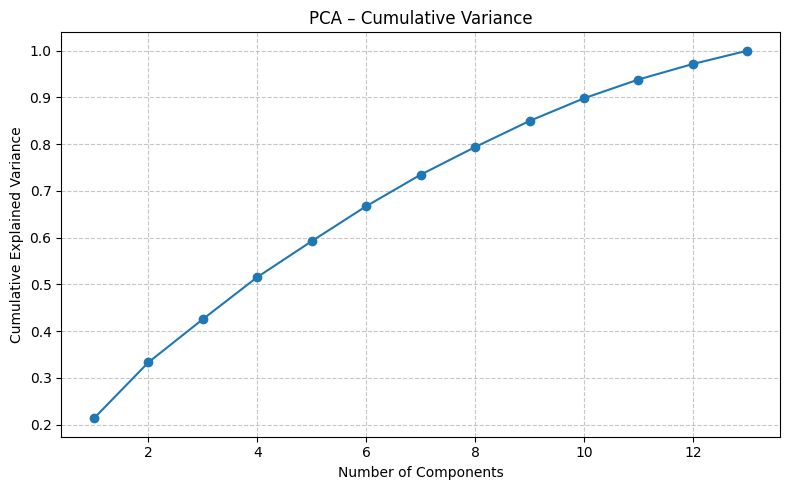

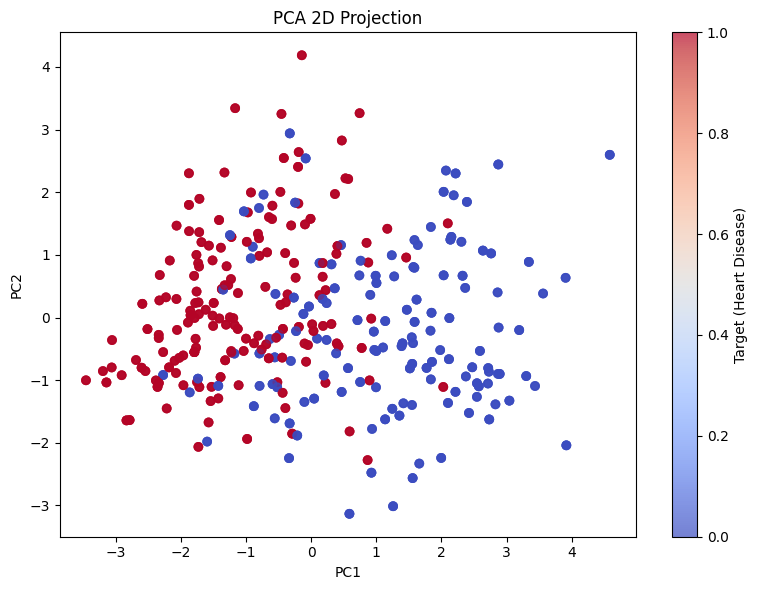

In [5]:
os.makedirs("../results", exist_ok=True)

# cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained) + 1), explained, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Cumulative Variance")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("../results/pca_cumulative_variance.png")

# 2D Projection using first 2 PCs
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Projection")
plt.colorbar(scatter, label="Target (Heart Disease)")
plt.tight_layout()
plt.savefig("../results/pca_scatter.png")

plt.show()


In [6]:
X_pca = pca.transform(X_scaled)
print("\n PCA transformed dataset shape:", X_pca.shape)


 PCA transformed dataset shape: (1025, 13)
